In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm_notebook

In [2]:
def extract_face(img, fc, tolerance):
    H, W, D = img.shape
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_coords = fc.detectMultiScale(gray, 1.2, tolerance, minSize=(60, 60))
    
    if len(face_coords) == 1:
        x, y, w, h = face_coords[0]
    elif len(face_coords) == 0:
        return None
    else:
        max_area = 0
        index = 0
        for i in range(len(face_coords)):
            _, _, wi, hi = face_coords[i]
            area = wi*hi
            if area > max_area:
                max_area = area
                index = i
        x, y, w, h = face_coords[index]
        
    crop = img[y:y+w, x:x+h] # can edit to expand dimensions
    
    return crop    

In [3]:
os.chdir('C:\\Users\\Linsu Han\\Documents\\[GITHUB]\\facial-feature-detection\\')
os.getcwd()

'C:\\Users\\Linsu Han\\Documents\\[GITHUB]\\facial-feature-detection'

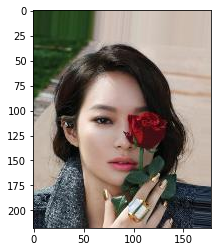

In [4]:
img = cv2.imread('data\\celeba-dataset\\img_align_celeba\\000507.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

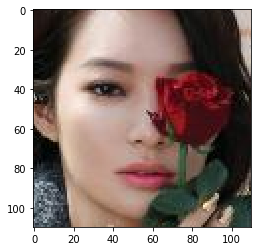

In [5]:
# example
fc = cv2.CascadeClassifier('resources\\haarcascade_frontalface_default.xml')
img = cv2.imread('data\\celeba-dataset\\img_align_celeba\\000507.jpg')
crop = extract_face(img, fc, 20)
rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [6]:
img_paths = glob.glob('data\\celeba-dataset\\img_align_celeba\\*.jpg')
destination = 'data\\celeba-dataset\\faces\\'
fc = cv2.CascadeClassifier('resources\\haarcascade_frontalface_default.xml')

for img_path in tqdm_notebook(img_paths):
    img = cv2.imread(img_path)
    crop = extract_face(img, fc, 20)
    if crop is not None:
        cv2.imwrite(destination+img_path.split('\\')[-1], crop)